# Teeth detection - Train

## Install and import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HOME = "/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection"

In [ ]:
%cd {HOME}/Cache

[Errno 2] No such file or directory: '{HOME}/Cache'
/content


In [1]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Inference with Pre-trained COCO Model

100% 6.23M/6.23M [00:00<00:00, 82.0MB/s]
2024-04-25 11:56:49.993781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 11:56:49.993825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 11:56:49.995266: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 11:56:51.003354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 20

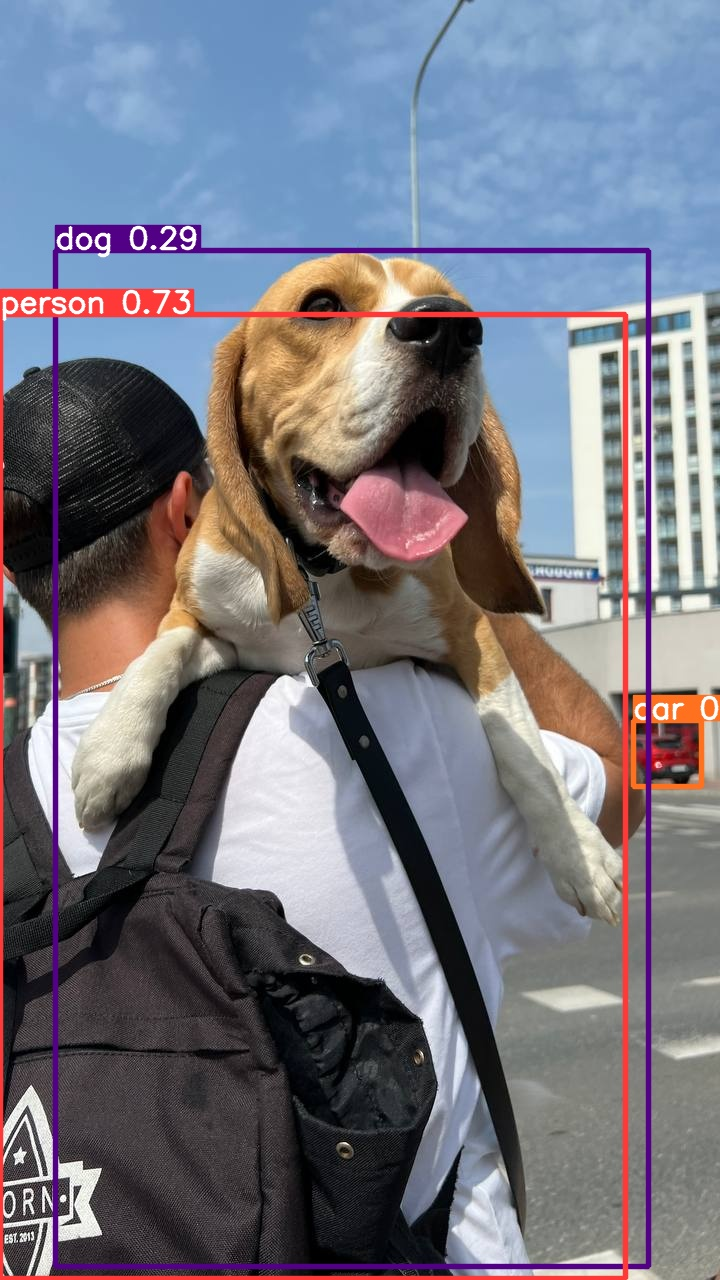

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true
Image(filename='runs/detect/predict/dog.jpeg', height=600)

## Custom Training

In [ ]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model.train(data=f'/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Dataset/Trainable_dataset/data.yaml', epochs=250, imgsz=640)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Dataset/Trainable_dataset/data.yaml, epochs=250, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

KeyboardInterrupt: 

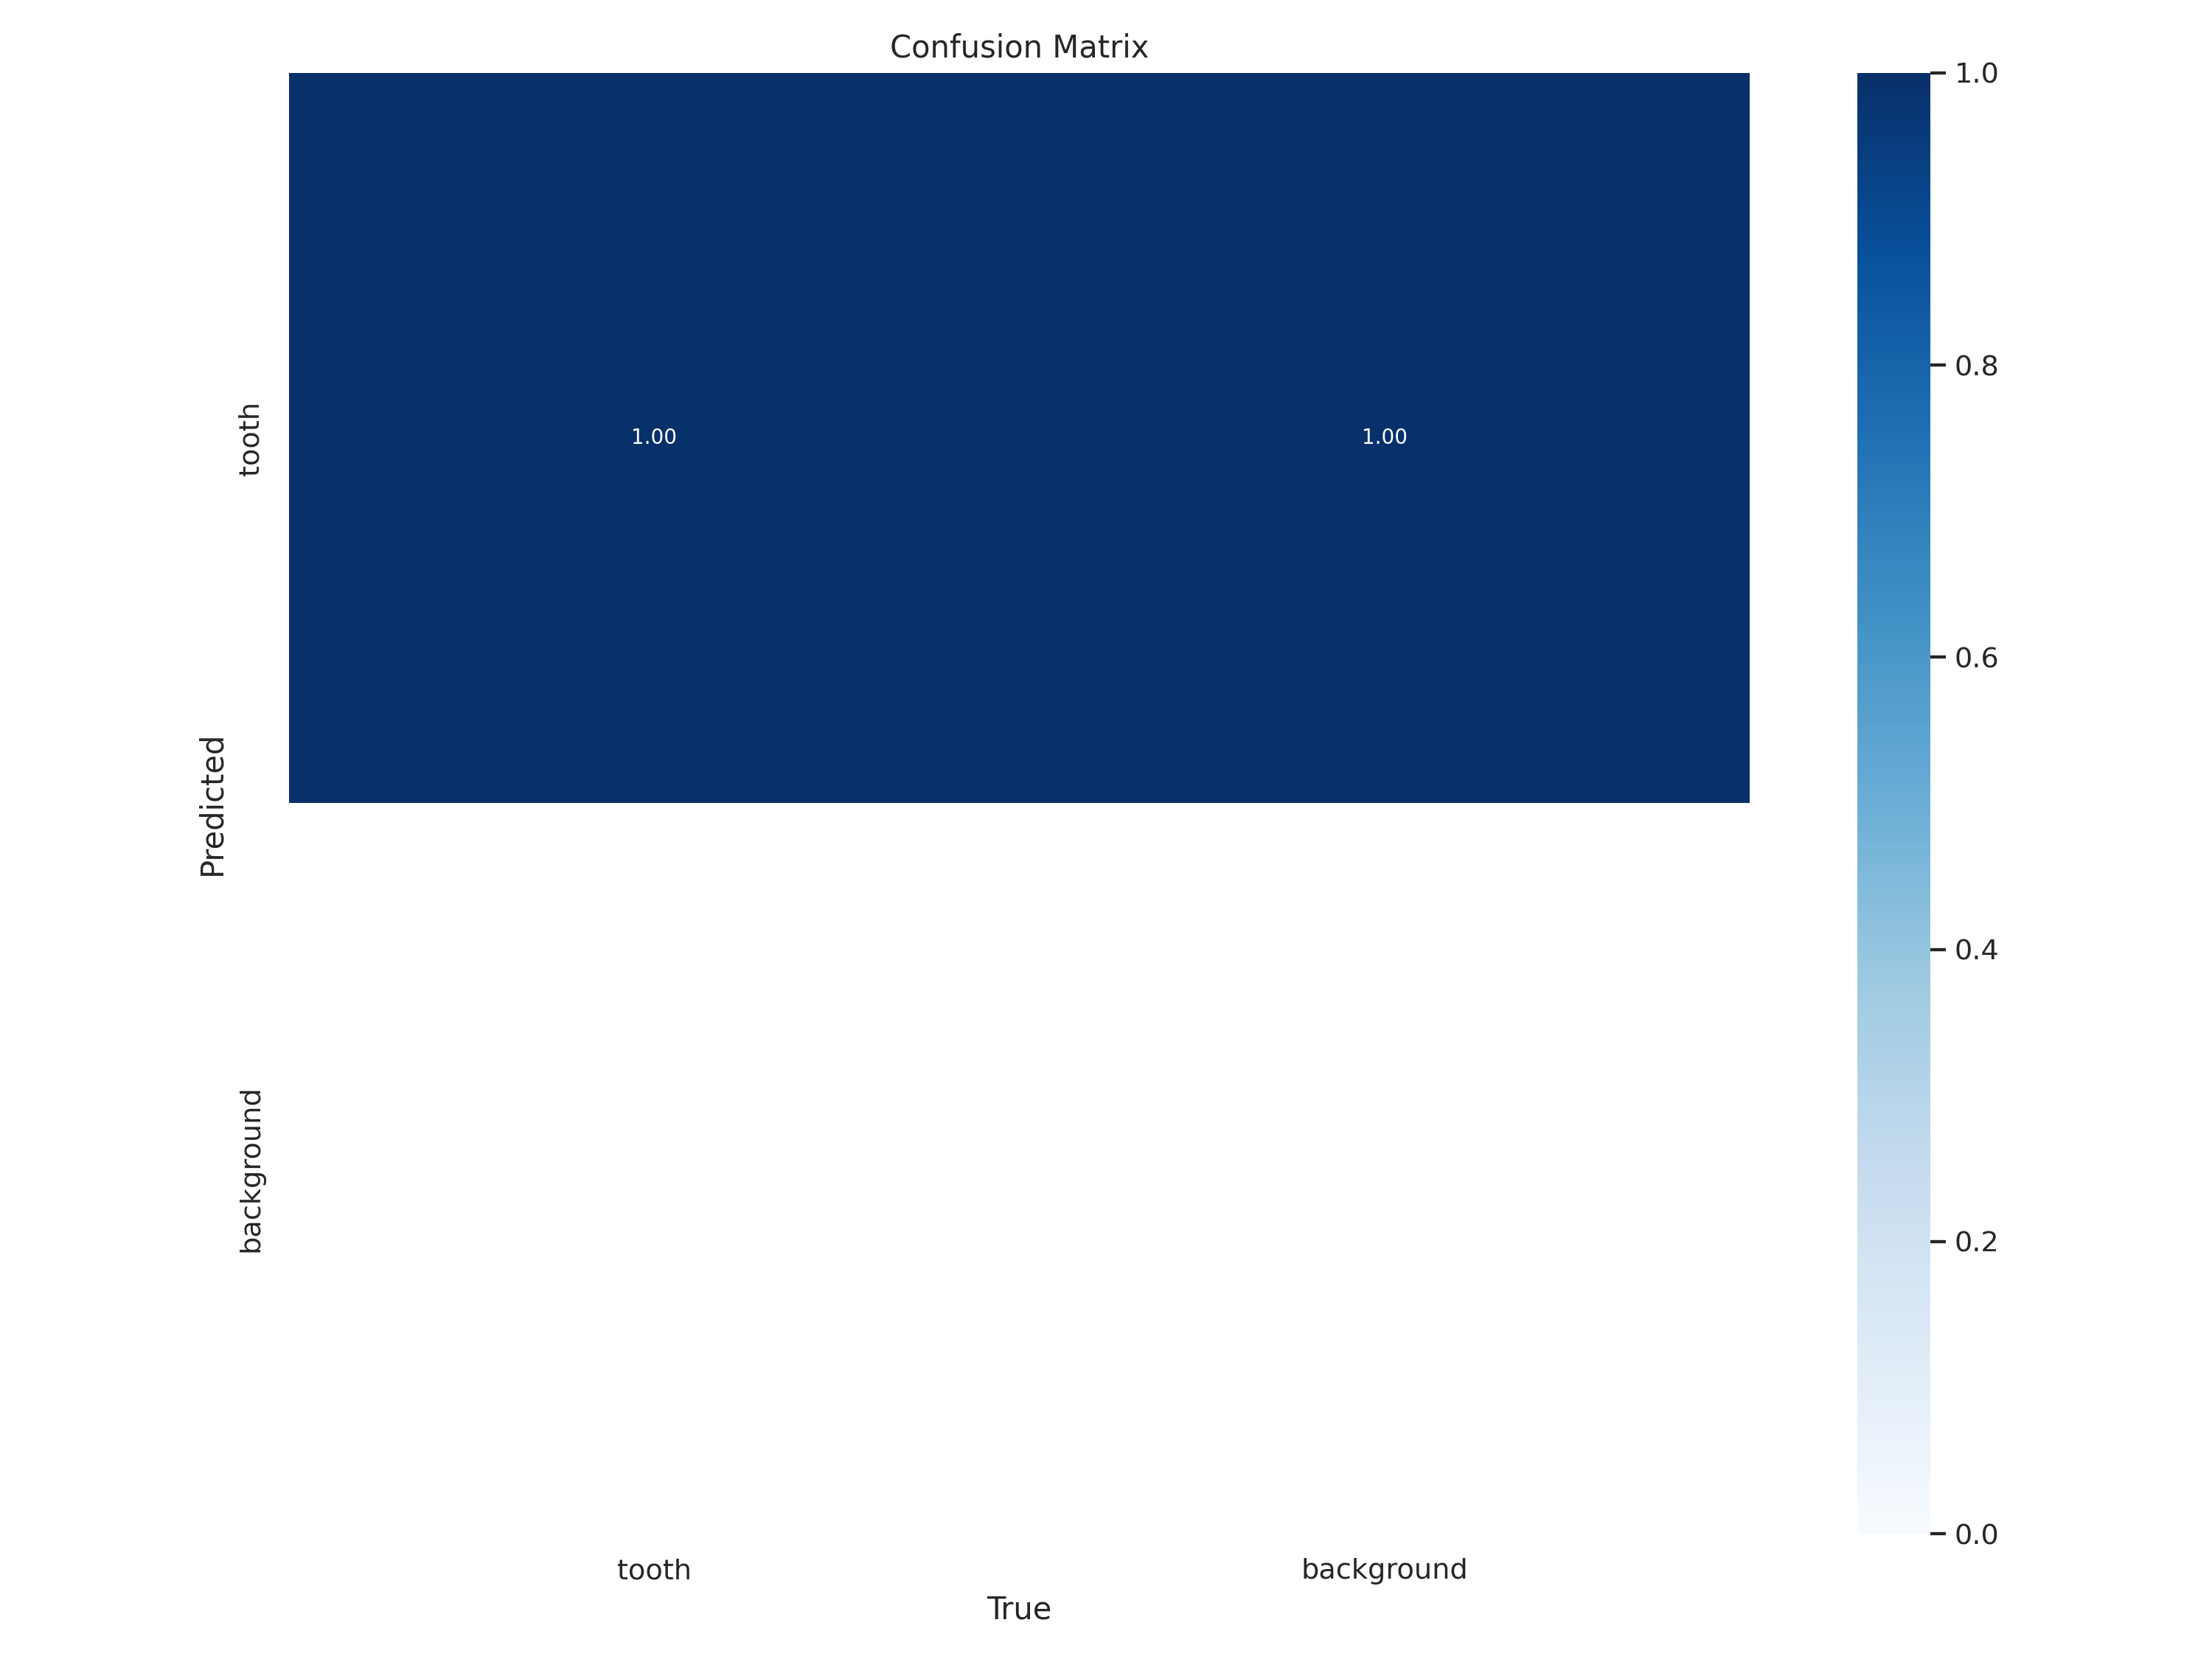

In [ ]:
Image(filename=f'/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Cache/runs/detect/train/confusion_matrix.png', width=600)

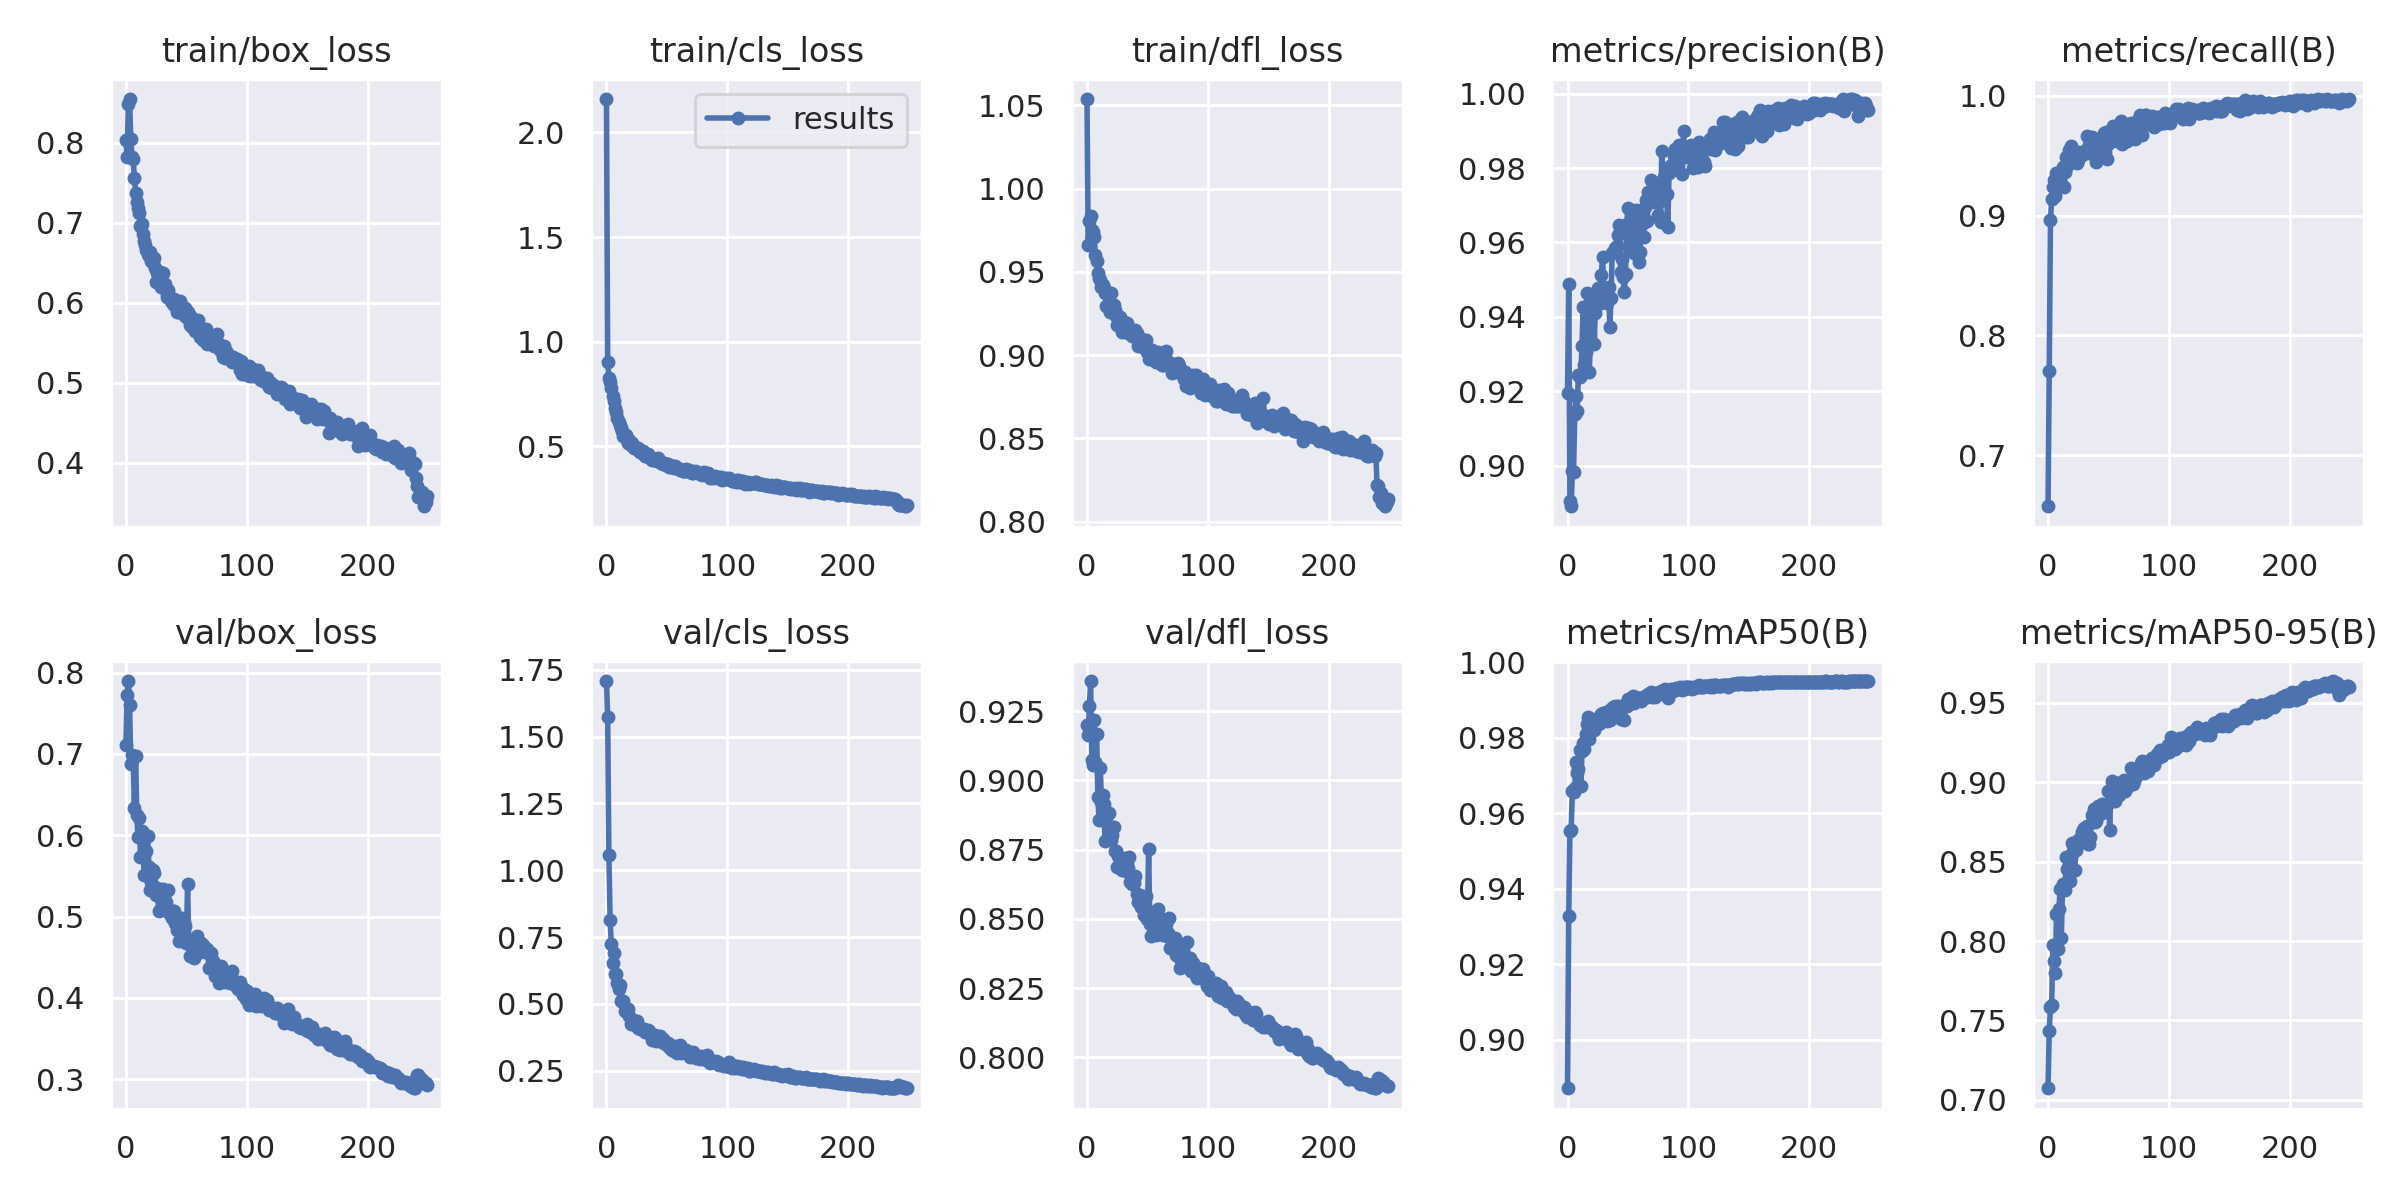

In [ ]:
Image(filename=f'/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Cache/runs/detect/train/results.png', width=600)

## Validate Custom Model

In [ ]:
model = YOLO(f'/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Cache/runs/detect/train/weights/best.pt')
model.val(data=f'/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Dataset/Trainable_dataset/data.yaml', epochs=10, imgsz=640, save="true")

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Dataset/Trainable_dataset/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:24<00:00,  1.88s/it]
                   all        200       2122      0.998      0.996      0.995      0.964
Speed: 0.6ms pre-process, 5.4ms inference, 0.0ms loss, 10.4ms post-process per image


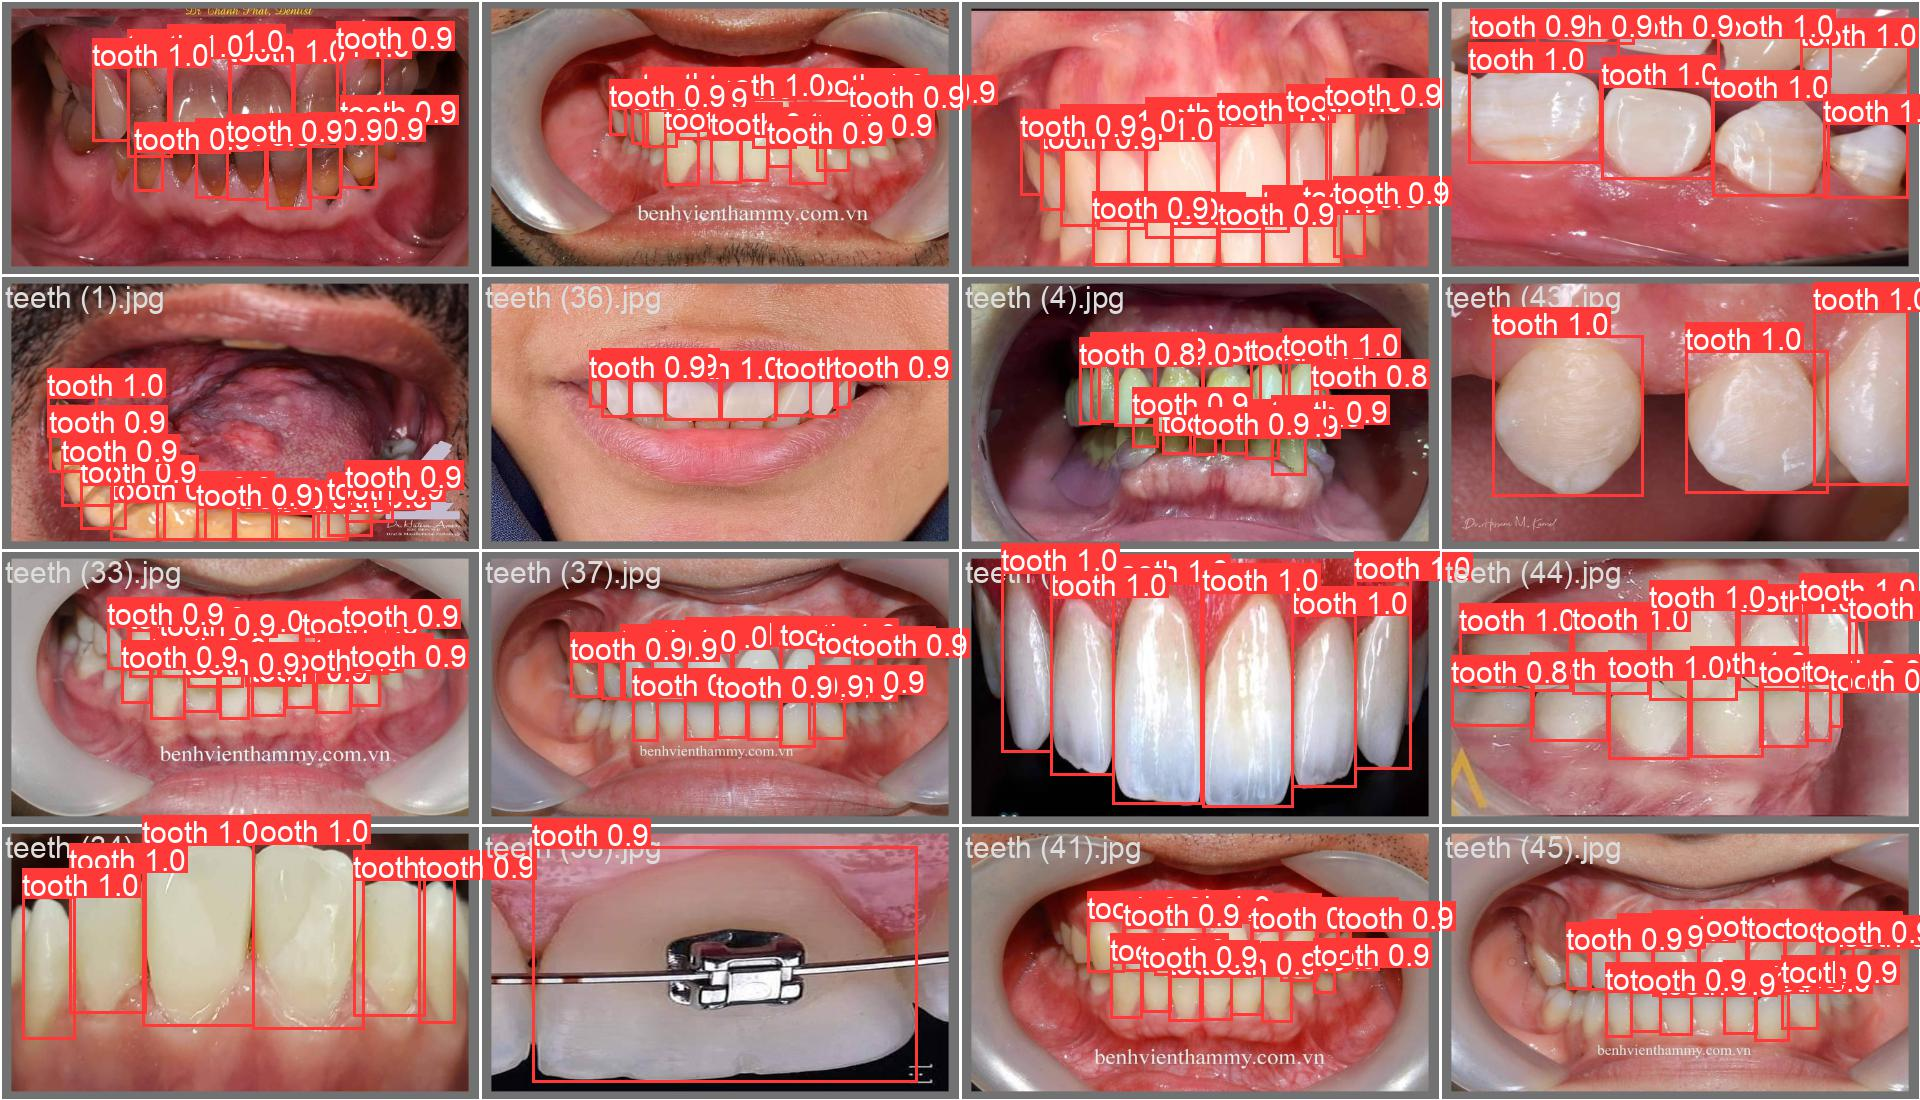

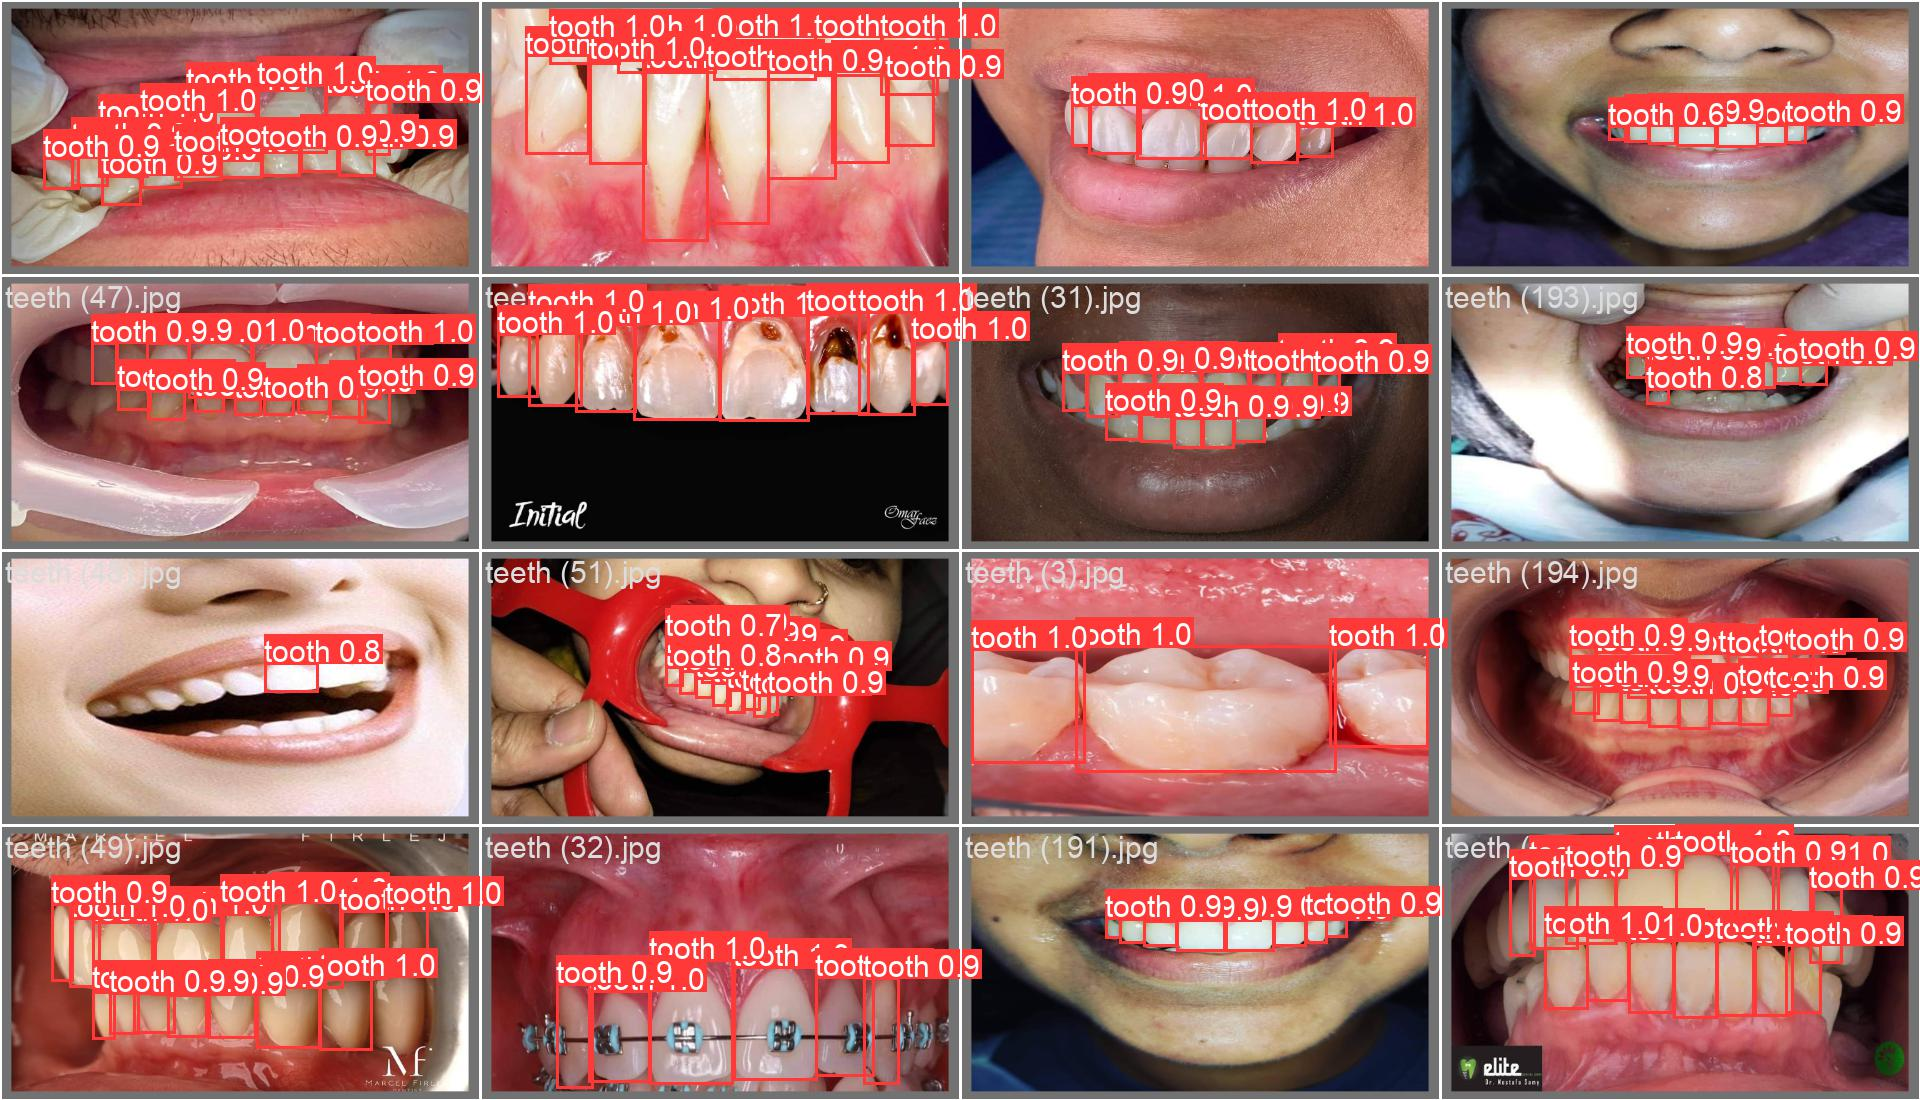

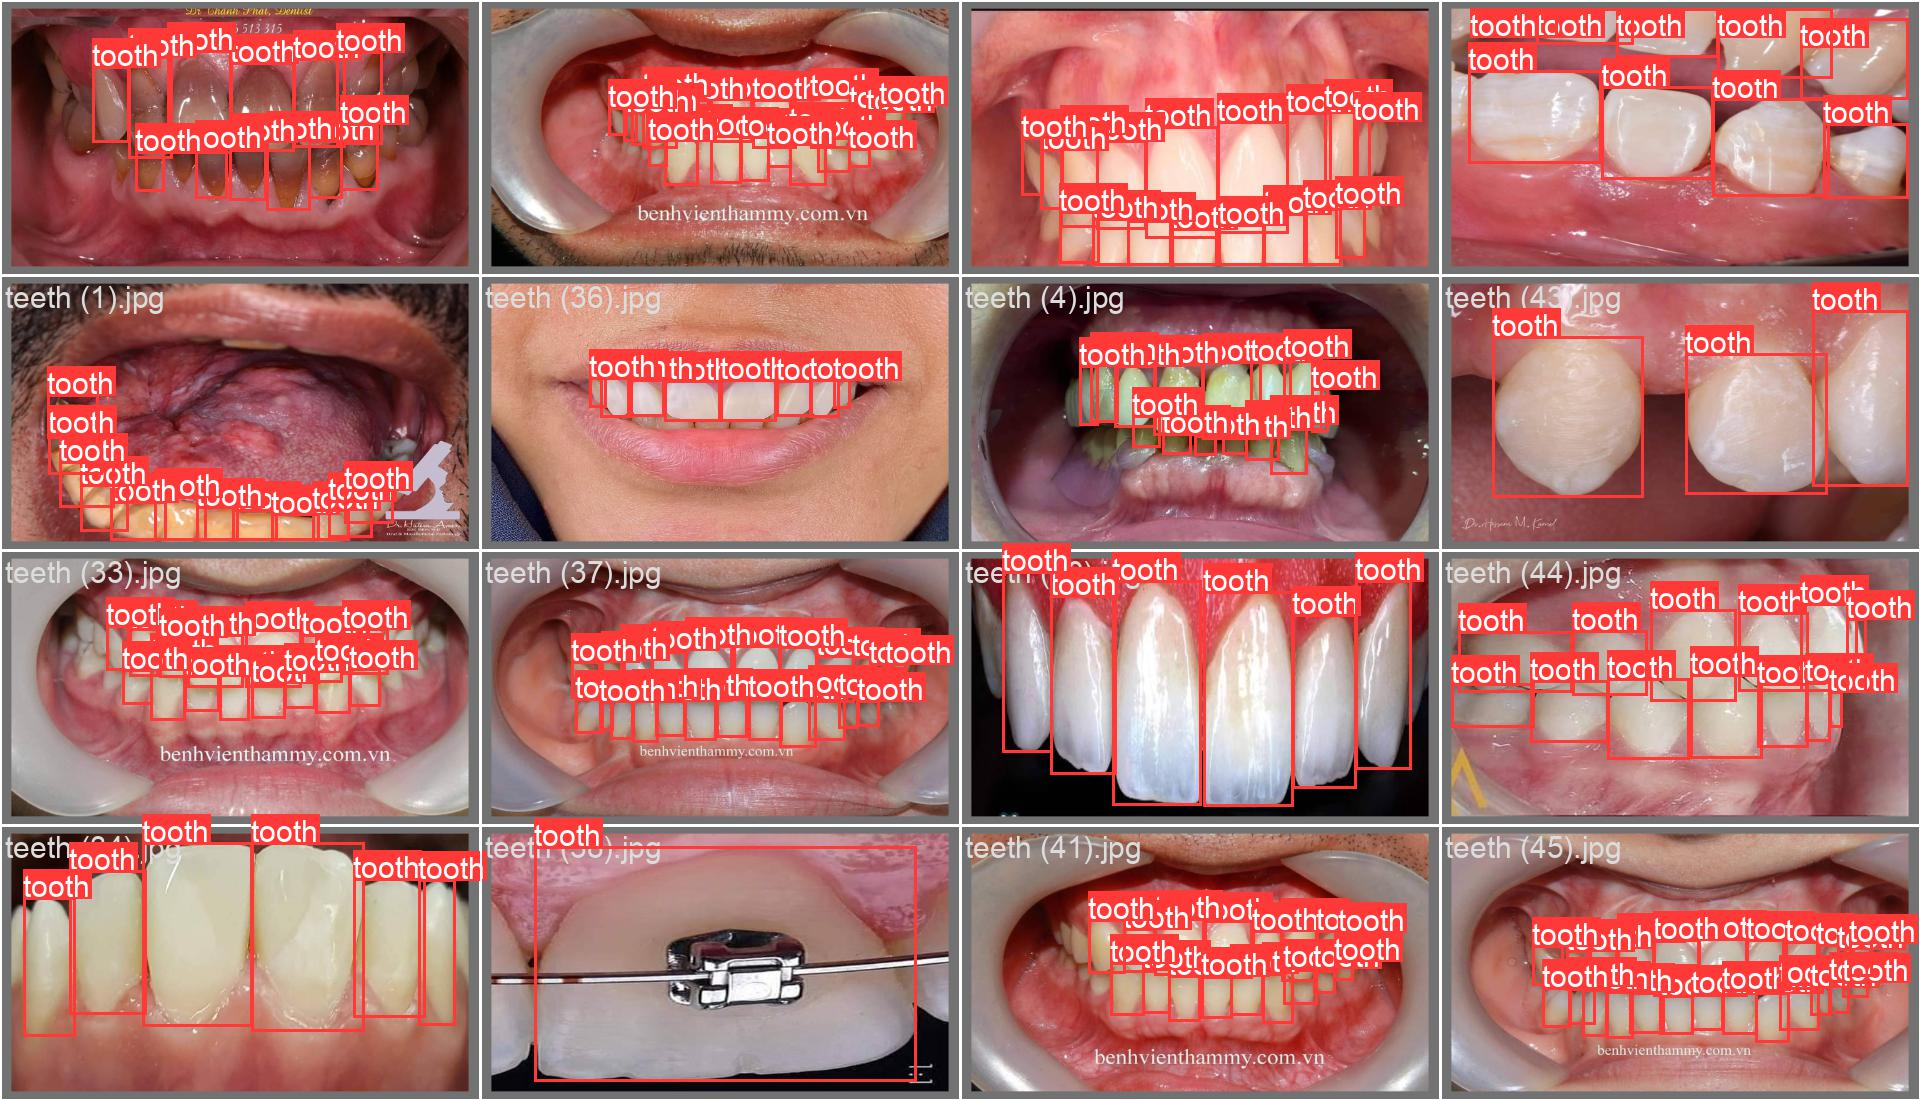

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/Final_Year/Implementation/Teeth_detection/Cache/runs/detect/val/*.jpg')[:3]:
  display(Image(filename=image_path, height=600))
  print("\n")